In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 0
setup_one_gpu(GPU)

Picking GPU 0


In [2]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

from general_tools.notebook.tf import reset_tf_graph
from general_tools.in_out.basics import create_dir, files_in_subdirs

from geo_tool import Point_Cloud

from tf_lab.in_out.basics import Data_Splitter, read_saved_epochs
from tf_lab.point_clouds.ae_templates import mlp_architecture_ala_iclr_18, default_train_params

from tf_lab.point_clouds.in_out import load_point_clouds_from_filenames, PointCloudDataSet
from tf_lab.data_sets.shape_net import pc_loader as snc_loader
from tf_lab.data_sets.shape_net import snc_category_to_synth_id

from tf_lab.iclr.helper import load_multiple_version_of_pcs
from tf_lab.neural_net import MODEL_SAVER_ID

from tf_lab.evaluate.generative_pc_nets import entropy_of_occupancy_grid, jensen_shannon_divergence
from tf_lab.nips.helper import pclouds_centered_and_half_sphere

from tf_lab.point_clouds.raw_gan import RawGAN

from tf_lab.point_clouds.generators_discriminators import mlp_discriminator, point_cloud_generator,\
leaky_relu

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
save_model = False
do_training = True
plot_train_curve = False
save_synthetic_samples = np.hstack([np.array([1, 5, 10]), np.arange(50, 2001, 50)])
class_name = raw_input('Give me the class type.\n').lower()
syn_id = snc_category_to_synth_id()[class_name]
# synthetic_data_out_dir = '/orions4-zfs/projects/optas/DATA/OUT/iclr/synthetic_samples/r_gan/'
synthetic_data_out_dir = '/orions4-zfs/projects/lins2/Panos_Space//DATA/OUT/iclr/synthetic_samples/r_gan/'

Give me the class type.
airplane


In [7]:
n_pc_points = 2048
max_epochs = 2000
arch_tag = 'mlp_pc_gen_default_leak_20'

leak = 0.2
adaptive_training = None
beta = 0.5

discriminator = mlp_discriminator
generator = point_cloud_generator

batch_size = 50
noise_params = {'mu':0, 'sigma': 0.2}
noise_dim = 128
init_lr = 0.0001

disc_kwargs = {'non_linearity': leaky_relu(leak), 'b_norm': False}
gen_kwargs = {'b_norm': False}

experiment_name = class_name + '_'+ arch_tag + '_raw_gan_' + str(n_pc_points) +  '_pts'

In [8]:
in_data = load_multiple_version_of_pcs('uniform_one', syn_id, n_classes=1)

405 pclouds were loaded. They belong in 1 shape-classes.
3438 pclouds were loaded. They belong in 1 shape-classes.
202 pclouds were loaded. They belong in 1 shape-classes.


In [9]:
training_data = in_data['train']
n_syn_samples = training_data.num_examples  # Same number as original GT data.

In [ ]:
reset_tf_graph()

gan = RawGAN(experiment_name, init_lr, [n_pc_points, 3], noise_dim,
             discriminator, generator, beta=beta, gen_kwargs=gen_kwargs, disc_kwargs=disc_kwargs)

accum_syn_data = []
train_stats = []

1 (1.363884918829974, 0.70986539388404168) 15.851927042


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


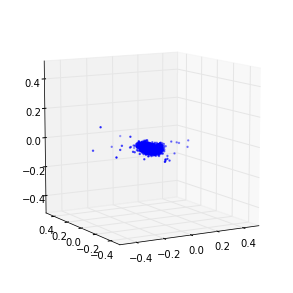

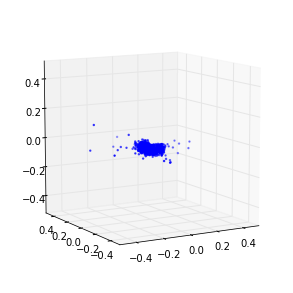

2 (1.3704320297521704, 0.72064447227646322) 15.4240808487
3 (1.3605772046481861, 0.73680935361806088) 15.4990830421
4 (1.3554961120381075, 0.75901694157544308) 15.5151200294
5 (1.3507088089690489, 0.7324201762676239) 15.5147411823


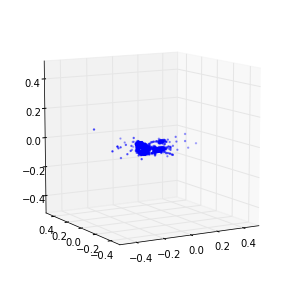

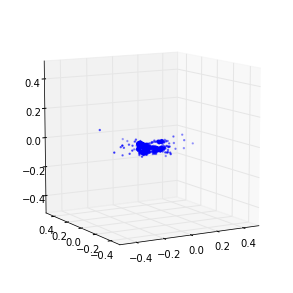

6 (1.2606756880002863, 0.79818413976360769) 15.5485329628
7 (1.1891763937823914, 0.9107430235427969) 15.5786309242
8 (1.1531933195450728, 1.0059790514847811) 15.6469559669
9 (1.1217440410571939, 1.0795028840794283) 15.685477972
10 (1.060841260587468, 1.0913834361469044) 15.8450698853


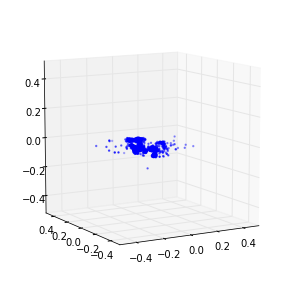

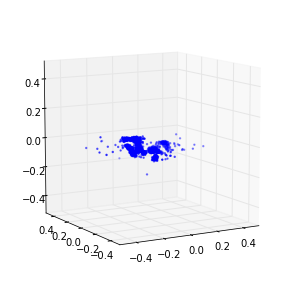

11 (1.1624073219649933, 1.0870565798352747) 15.7472741604
12 (1.3213749177315657, 0.89343683596919565) 16.1339559555
13 (1.2933702503933626, 0.78890768570058489) 16.1841139793
14 (1.296533300596125, 0.82464178432436552) 15.9270701408
15 (1.3144697652143591, 0.82255150903673735) 15.9727141857
16 (1.2280116414322573, 0.84404403497191038) 16.2877850533
17 (1.3236095607280731, 0.82778312441180735) 15.8258891106
18 (1.2669631242752075, 0.83792925143943109) 15.8319921494
19 (1.3213177831733929, 0.79307517584632425) 16.1323599815
20 (1.3156967408516829, 0.797326435937601) 15.9185409546
21 (1.3217034620397232, 0.80174807941212378) 15.8752140999
22 (1.3293671572909636, 0.79085664714083947) 15.7983858585
23 (1.3242889502469231, 0.82819270474069262) 15.7857289314
24 (1.34310842962826, 0.79940978656796846) 15.7225139141
25 (1.301642053267535, 0.79277625767623672) 16.3242070675
26 (1.3347137675565832, 0.79526749691542453) 15.8109807968
27 (1.3369112453039955, 0.77592345721581402) 15.7345430851
28 (

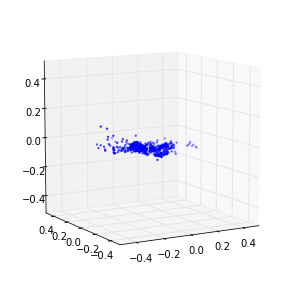

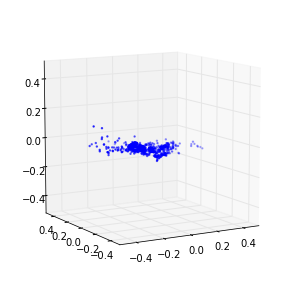

51 (1.3376920240766861, 0.75148042335229759) 15.8179700375
52 (1.348419545327916, 0.77820228566141691) 15.8526570797
53 (1.3376968152382795, 0.77171122414224291) 15.9271559715
54 (1.3490234297864578, 0.7724680102923337) 15.8452439308
55 (1.3409332878449385, 0.79334613067262316) 15.6330199242
56 (1.3288599796154921, 0.77888202930197992) 15.7804229259
57 (1.3167042539400213, 0.7872070827904869) 15.9711329937
58 (1.3306655042311724, 0.783470060895471) 15.7518489361
59 (1.3376187980175018, 0.7729298209442812) 15.9529480934
60 (1.3371279134469873, 0.76652701724978056) 15.7740960121
61 (1.3447487932794235, 0.75707228481769562) 15.9415669441
62 (1.3437580746762894, 0.75065560901866235) 15.716449976
63 (1.3268298015874975, 0.75824486946358405) 15.6559112072
64 (1.3502756760400885, 0.76734255078960867) 15.7537350655
65 (1.3483766089467442, 0.77534120486063118) 15.7064740658
66 (1.339491507586311, 0.76594285316327038) 16.1981840134
67 (1.3340144946294672, 0.77158425485386573) 15.8230400085
68 (1

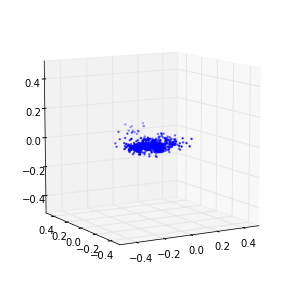

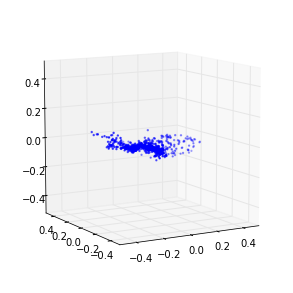

101 (1.3627653577748466, 0.7445046209237155) 15.7806890011
102 (1.3636613979059107, 0.75265290807275209) 15.7569518089
103 (1.3629451131119448, 0.73667970387374648) 16.1927518845
104 (1.3622613338863148, 0.73422666156993188) 15.6553552151
105 (1.3648013384903179, 0.74062693206702956) 16.0423259735
106 (1.3631063314045178, 0.73698863913031187) 15.7565019131
107 (1.3585243260159212, 0.74287333295625801) 15.8988249302
108 (1.3594517742886263, 0.74139845897169676) 15.7346599102
109 (1.3570510219125187, 0.74353484634090872) 16.0613920689
110 (1.3575438383747549, 0.75090061303447275) 15.7615289688
111 (1.3661347522455103, 0.74884896155665903) 15.7879860401
112 (1.3573156612760879, 0.74808912154506235) 16.1828761101
113 (1.3616418347639196, 0.74688305924920473) 15.8016171455
114 (1.3564054597826565, 0.73448102526804981) 15.8663189411
115 (1.362027496099472, 0.74397934096701002) 16.0837540627
116 (1.357549819876166, 0.74411846960292138) 15.7370772362
117 (1.3659774047486923, 0.7483646107070586

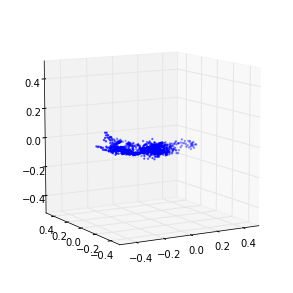

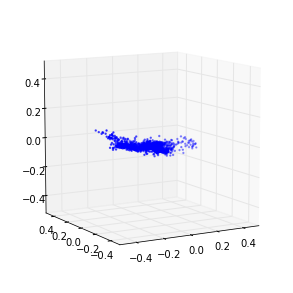

151 (1.3736627978437088, 0.73871635864762697) 15.6821501255
152 (1.3686277901425081, 0.74208985181415787) 15.7156889439
153 (1.3640832673100864, 0.74469893557183886) 15.9845221043
154 (1.3627929424538332, 0.73806675830308133) 15.693253994
155 (1.3651901904274435, 0.73830167949199677) 15.9474880695
156 (1.3692228951874901, 0.73948909166981192) 15.6924209595
157 (1.365517242866404, 0.74434710337835197) 15.7858409882
158 (1.3676770750214071, 0.74489652496926928) 15.7531869411
159 (1.3636828310349409, 0.73322336375713348) 15.7571258545
160 (1.3692044405376209, 0.73692662225050087) 16.2735190392
161 (1.3601453093921436, 0.75195180230280934) 15.6889679432
162 (1.3662954323432024, 0.73589119402801284) 15.8838088512
163 (1.3630574415711796, 0.74317528921015119) 15.7317709923
164 (1.3617565123473896, 0.74097207013298483) 15.7639300823
165 (1.3634476030574125, 0.74084109769147988) 16.0107038021
166 (1.3584117889404297, 0.74617623143336353) 15.8345730305
167 (1.361438092063455, 0.7394688392386716

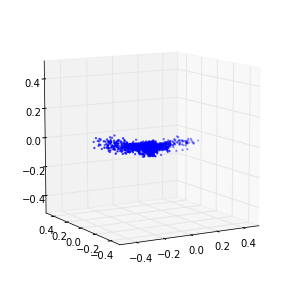

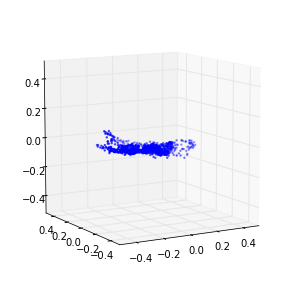

201 (1.3432956530767328, 0.76908276975154877) 15.7240958214
202 (1.344705599195817, 0.7649652510881424) 15.848803997
203 (1.3308828385437237, 0.76627657343359556) 15.9529261589
204 (1.3251701786237604, 0.77120625096208906) 15.8620738983
205 (1.3397648457218618, 0.7710921102586914) 15.8505089283
206 (1.3251967763199526, 0.77071696081582242) 15.824641943
207 (1.339582448496538, 0.77793496365056314) 15.7279210091
208 (1.3373848252436693, 0.7768710316980586) 16.0455288887
209 (1.3329362816670363, 0.77196461312911091) 15.7737729549
210 (1.3255208345020519, 0.77433925691772909) 15.8041219711
211 (1.3353714662439682, 0.78161912279970502) 15.8394958973
212 (1.3335286168491138, 0.78259195737978993) 15.9302999973
213 (1.3316131970461678, 0.77592889613964977) 15.8241791725
214 (1.3289342785582823, 0.78267076348557196) 15.6701929569
215 (1.3301250180777382, 0.77451702163499947) 15.9435939789
216 (1.3138066547758438, 0.78343353814938488) 15.671225071
217 (1.3184439417193918, 0.78190273747724648) 15

In [ ]:
save_syn_data_dir = create_dir(osp.join(synthetic_data_out_dir, experiment_name))

if do_training:
    for _ in range(max_epochs):
        loss, duration = gan._single_epoch_train(training_data, batch_size, noise_params, adaptive=adaptive_training)
        epoch = int(gan.sess.run(gan.epoch.assign_add(tf.constant(1.0))))
        print epoch, loss, duration
        if save_model and epoch % 10 == 0:
            checkpoint_path = osp.join(train_dir, model_saver_id)
            gan.saver.save(gan.sess, checkpoint_path, global_step=gan.epoch)
            
        if epoch in save_synthetic_samples:
            syn_data = gan.generate(n_syn_samples, noise_params)
            accum_syn_data.append(syn_data)
            np.savez(osp.join(save_syn_data_dir, 'epoch_' + str(epoch)), syn_data)            
            for k in range(2):
                Point_Cloud(syn_data[k]).plot()
        train_stats.append((epoch,) + loss)

In [ ]:
if plot_train_curve:
    x = range(len(train_stats))
    d_loss = [t[1] for t in train_stats]
    g_loss = [t[2] for t in train_stats]
    plt.plot(x, d_loss, '--')
    plt.plot(x, g_loss)
    plt.title('Latent GAN training. (%s, %s)' %(class_name, ae_loss))
    plt.legend(['Discriminator', 'Generator'], loc=0)
    
    plt.tick_params(axis='x', which='both', bottom='off', top='off')
    plt.tick_params(axis='y', which='both', left='off', right='off')
    
    plt.xlabel('Epochs.') 
    plt.ylabel('Loss.')